
Importando a bibliotecas necessárias

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

import tensorflow as tf
import keras
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from tensorflow.keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
from tensorflow.keras.utils import plot_model

# Load VGG16 without the top FC Layers.
from tensorflow.keras.applications import VGG16

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

from tensorflow.keras.utils import to_categorical



Preparando os Dados

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

base_dir = r'/content/drive/My Drive/att_faces/'
samples_per_class = 10  # number of samples per class (subject)

# Image path
folder_list = os.listdir(base_dir)
print(len(folder_list), "subjects in the list")

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# loading the images
def load(start, end):
  x=[]
  y=[]
  sujeito=[]
  folder = start
  category_list=[]
  y_label=0
  for folder_name in folder_list:
      files_list = os.listdir(os.path.join(base_dir, folder_name))
      folder=folder+1
      if (folder >= start and folder <= end):
          temp=[]
          print(folder_name)
          for file_name in files_list[:samples_per_class]:
            temp.append(len(x))
            print(temp)
            sujeito.append(folder_name)
            im=np.asarray(Image.open(os.path.join(base_dir, folder_name, file_name)).convert('RGB').resize((224, 224)))
            im = im.astype('float32')
            im = np.expand_dims(im, axis=0)
            x.append(im)
            print(y_label)
            y.append(y_label)
          category_list.append(temp)
          y_label+=1
  print(category_list)
  return x, y, category_list, sujeito

# subjects from 0 to 20 for training
x_train, y_train, category_train_list, sujeito_train = load(0, 20)
category_train = np.asarray(category_train_list)
x_train = np.asarray(x_train)/255
y_train = np.asarray(y_train)
x_train = x_train.reshape(x_train.shape[0], 224, 224, 3)
print('X_train, Y_train shapes',x_train.shape, y_train.shape, category_train.shape)

# subjects from 21 to 28 for validation
x_val, y_val, category_val_list, sujeito_val = load(21, 28)
category_val = np.asarray(category_val_list)
x_val = np.asarray(x_val)/255
y_val = np.asarray(y_val)
x_val = x_val.reshape(x_val.shape[0], 224, 224, 3)
print('X_val, Y_val shapes',x_val.shape, y_val.shape, category_val.shape)

# subjects from 29 to 40 for testing
x_test, y_test, category_test_list, sujeito_test = load(29, 40)
category_test = np.asarray(category_test_list)
x_test = np.asarray(x_test)/255
y_test = np.asarray(y_test)
x_test = x_test.reshape(x_test.shape[0], 224, 224, 3)
print('X_test, Y_test shapes',x_test.shape, y_test.shape, category_test.shape)

train_size = int(len(category_train_list))
val_size =   int(len(category_val_list))
test_size =  int(len(category_test_list))

print(category_train)

print('Sizes: ')
print(train_size, val_size, test_size)

40 subjects in the list
s8
[0]
0
[0, 1]
0
[0, 1, 2]
0
[0, 1, 2, 3]
0
[0, 1, 2, 3, 4]
0
[0, 1, 2, 3, 4, 5]
0
[0, 1, 2, 3, 4, 5, 6]
0
[0, 1, 2, 3, 4, 5, 6, 7]
0
[0, 1, 2, 3, 4, 5, 6, 7, 8]
0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
0
s37
[10]
1
[10, 11]
1
[10, 11, 12]
1
[10, 11, 12, 13]
1
[10, 11, 12, 13, 14]
1
[10, 11, 12, 13, 14, 15]
1
[10, 11, 12, 13, 14, 15, 16]
1
[10, 11, 12, 13, 14, 15, 16, 17]
1
[10, 11, 12, 13, 14, 15, 16, 17, 18]
1
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
1
s7
[20]
2
[20, 21]
2
[20, 21, 22]
2
[20, 21, 22, 23]
2
[20, 21, 22, 23, 24]
2
[20, 21, 22, 23, 24, 25]
2
[20, 21, 22, 23, 24, 25, 26]
2
[20, 21, 22, 23, 24, 25, 26, 27]
2
[20, 21, 22, 23, 24, 25, 26, 27, 28]
2
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
2
s39
[30]
3
[30, 31]
3
[30, 31, 32]
3
[30, 31, 32, 33]
3
[30, 31, 32, 33, 34]
3
[30, 31, 32, 33, 34, 35]
3
[30, 31, 32, 33, 34, 35, 36]
3
[30, 31, 32, 33, 34, 35, 36, 37]
3
[30, 31, 32, 33, 34, 35, 36, 37, 38]
3
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
3
s38
[40]
4
[40, 4

In [4]:


# Siamese Neural Network (SNN)
from tensorflow.keras.applications.vgg16 import VGG16
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Construingo a SNN (Siamese Neural Network)
input_shape=(224, 224, 3)
left_input=Input(input_shape)
right_input=Input(input_shape)

b_init = keras.initializers.RandomNormal(mean=0.5, stddev=1e-2)

# nossa CNN
model=Sequential()
model.add(vgg_conv)
model.add(Flatten())
model.add(Dense(256, activation='sigmoid'))

# obtendo a representação (vetor de features) de cada imagem (esquerda = encoded_l, e direita = enconded_r)
encoded_l=model(left_input)
encoded_r=model(right_input)

# cálculo da distância entre as imagens (usando L1, ou Manhatan distance)
L1_layer = Lambda(lambda tensors:K.abs(tensors[0]-tensors[1]))
L1_distance = L1_layer([encoded_l, encoded_r])

# cálculo da similaridade (ou dissimilaridade)
prediction = Dense(1, activation='sigmoid', bias_initializer=b_init)(L1_distance)

# modelo da rede siamesa
siamese_net = Model([left_input, right_input], prediction)

for layer in model.layers[:-2]:
  layer.trainable = False

# compilando o modelo
optimizer=Adam(lr=0.001)
siamese_net.compile(loss='binary_crossentropy', optimizer=optimizer)

# plotando o modelo
plot_model(siamese_net, show_shapes=True, show_layer_names=True)

model.summary()
siamese_net.summary()

58889256/58889256 [==============================] - 2s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
Total params: 21137472 (80.63 MB)
Trainable params: 6422784 (24.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0 

# Gerando Batch para treinamento

In [5]:
# It returns batches of image pairs
def get_batch(batch_size=32):
    temp_x = x_train
    temp_cat_list = category_train
    start=0
    end=train_size
    batch_x=[]

    batch_y = np.zeros(batch_size)
    batch_y[int(batch_size/2):] = 1
    np.random.shuffle(batch_y)

    class_list = np.random.randint(start, end, batch_size)
    batch_x.append(np.zeros((batch_size, 224, 224, 3)))
    batch_x.append(np.zeros((batch_size, 224, 224, 3)))

    for i in range(0, batch_size):
        batch_x[0][i] = temp_x[np.random.choice(temp_cat_list[class_list[i]])]
        #If train_y has 0 pick from the same class, else pick from any other class
        if batch_y[i]==1:
            batch_x[1][i] = temp_x[np.random.choice(temp_cat_list[class_list[i]])]

        else:
            temp_list = np.append(temp_cat_list[:class_list[i]].flatten(), temp_cat_list[class_list[i]+1:].flatten())
            batch_x[1][i] = temp_x[np.random.choice(temp_list)]

    return(batch_x, batch_y)

Training model

In [6]:
# SNN training
epochs = 1000   # quantidade de épocas
batch_size = 32

for epoch in range(1, epochs):
  batch_x, batch_y = get_batch(batch_size)
  loss = siamese_net.train_on_batch(batch_x, batch_y)
  print('Epoch:', epoch, ", Loss:", loss)



Epoch: 1 , Loss: 0.7102275490760803
Epoch: 2 , Loss: 0.6122603416442871
Epoch: 3 , Loss: 0.5009358525276184
Epoch: 4 , Loss: 0.5105581283569336
Epoch: 5 , Loss: 0.4614475965499878
Epoch: 6 , Loss: 0.49001654982566833
Epoch: 7 , Loss: 0.45313888788223267
Epoch: 8 , Loss: 0.4624330401420593
Epoch: 9 , Loss: 0.4251505732536316
Epoch: 10 , Loss: 0.3546367883682251
Epoch: 11 , Loss: 0.3747348487377167
Epoch: 12 , Loss: 0.4142986536026001
Epoch: 13 , Loss: 0.40069079399108887
Epoch: 14 , Loss: 0.31224992871284485
Epoch: 15 , Loss: 0.3043544888496399
Epoch: 16 , Loss: 0.28756168484687805
Epoch: 17 , Loss: 0.32399916648864746
Epoch: 18 , Loss: 0.27922558784484863
Epoch: 19 , Loss: 0.32128316164016724
Epoch: 20 , Loss: 0.27740681171417236
Epoch: 21 , Loss: 0.31850793957710266
Epoch: 22 , Loss: 0.24502013623714447
Epoch: 23 , Loss: 0.28226667642593384
Epoch: 24 , Loss: 0.2601017951965332
Epoch: 25 , Loss: 0.24475093185901642
Epoch: 26 , Loss: 0.2899951934814453
Epoch: 27 , Loss: 0.24201849102973

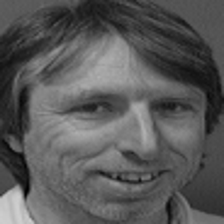

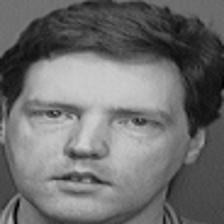

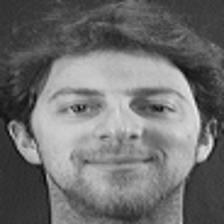

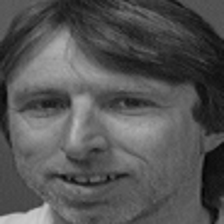

1/1 [==============================] - 3s 3s/step
[8.635614904051181e-06, 4.344532044342486e-06, 0.9992904663085938]
2


In [20]:
# Testing with an specific image

import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

temp=[]
temp.append(np.zeros((3, 224, 224, 3)))
temp.append(np.zeros((3, 224, 224, 3)))

q=32 # query image is 32
a=44 # image of other subject
b=25 # # image of other subject
c=34 # genuine sample (samme subject than 32)

# It is necessary since our network needs a color image
temp[0][0]=x_test[q]
temp[0][1]=x_test[q]
temp[0][2]=x_test[q]

temp[1][0] = x_test[a]
temp[1][1] = x_test[b]
temp[1][2] = x_test[c]

im=x_test[q].copy()
#im[:,:,[0,1,2]]=im[:,:,[2,1,0]]
cv2_imshow(im*255)

im=x_test[a].copy()
#im[:,:,[0,1,2]]=im[:,:,[2,1,0]]
cv2_imshow(im*255)

im=x_test[b].copy()
#im[:,:,[0,1,2]]=im[:,:,[2,1,0]]
cv2_imshow(im*255)

im=x_test[c].copy()
#im[:,:,[0,1,2]]=im[:,:,[2,1,0]]
cv2_imshow(im*255)

result = siamese_net.predict(temp)

result = result.flatten().tolist()
print(result)
result_index = result.index(max(result))
print(result_index)

In [21]:
# Another testing
from google.colab.patches import cv2_imshow
import time
temp=[]
temp.append(np.zeros((1, 224, 224, 3)))
temp.append(np.zeros((1, 224, 224, 3)))

plt.figure(figsize=(8, 3))

VP=VN=FP=FN=0

print(sujeito_test)

start = time.time()
for i in range (0, 50):
    temp[0][0]=x_test[i]

    for j in range (0, 50):

        if (i==j): continue

        if (sujeito_test[i] == sujeito_test[j]):
            mesmo_individuo = True
        else:
            mesmo_individuo = False

        temp[1][0]=x_test[j]
        result = siamese_net.predict(temp)

 #       im=x_test[i]*255
 #       cv2_imshow(im)
 #       im1=x_test[j]*255
 #       cv2_imshow(im1)


        if (mesmo_individuo and result[0][0] > 0.9):
            print(sujeito_test[i], sujeito_test[j], result[0][0], "OK  VP")
            VP=VP+1

        if (mesmo_individuo and result[0][0] < 0.9):
            print(sujeito_test[i], sujeito_test[j], result[0][0], "erro  FN")
            FN=FN+1

        if (not mesmo_individuo and result[0][0] > 0.9):
            print(sujeito_test[i], sujeito_test[j], result[0][0], "erro  FP")
            FP=FP+1

        if (not mesmo_individuo and result[0][0] < 0.9):
            print(sujeito_test[i], sujeito_test[j], result[0][0], "Ok  VN")
            VN=VN+1

end = time.time()
print('Evaluation time: {}s'.format(round(end - start, 7)))

print("VP = ", VP)
print("VN = ", VN)
print("FP = ", FP)
print("FN = ", FN)

P=VP/(VP+FP)
R=VP/(VP+FN)

print("Acurácia: ", (VP+VN)/(VP+FP+FN+VN))
print("Precisão: ", P)
print("Revocação: ", R)
print("F_score: ", 2/(1/P + 1/R))

['s8', 's8', 's8', 's8', 's8', 's8', 's8', 's8', 's8', 's8', 's37', 's37', 's37', 's37', 's37', 's37', 's37', 's37', 's37', 's37', 's7', 's7', 's7', 's7', 's7', 's7', 's7', 's7', 's7', 's7', 's39', 's39', 's39', 's39', 's39', 's39', 's39', 's39', 's39', 's39', 's38', 's38', 's38', 's38', 's38', 's38', 's38', 's38', 's38', 's38', 's6', 's6', 's6', 's6', 's6', 's6', 's6', 's6', 's6', 's6', 's4', 's4', 's4', 's4', 's4', 's4', 's4', 's4', 's4', 's4', 's40', 's40', 's40', 's40', 's40', 's40', 's40', 's40', 's40', 's40', 's9', 's9', 's9', 's9', 's9', 's9', 's9', 's9', 's9', 's9', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's5', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's32', 's32']
1/1 [==============================] - 2s 2s/step
s8 s8 0.9995327 OK  VP
1/1 [==============================] - 0s 20ms/step
s8 s8 0.9998914 OK  VP
1/1 [==============================] - 0s 19ms/step
s8 s8 0.9999045 OK  VP
1/1 [==============================] - 0s 22ms/step
s8 s8 0.999302

<Figure size 800x300 with 0 Axes>